# Lab 4: Digital Number and Letter Recognition (One vs One) Using Neural Networks

- Coursework Admin: Junru Lu
- Office: CS2.18
- Email: junru.lu@warwick.ac.uk


## Aim
The aim of this coursework is to explore the classification of digital numbers and letters using Perceptrons on linearly separable datasets.

## Programming Language
You are encouraged to use Python (NumPy) and its open source neural computing libraries (Scikit-Learn and PyTorch) for this assignment. (c.f. Lectures on Weeks 3a, 4a, 5a).

**NB**: For students who have no experience with Python but would like to use Mathematica (or MATLAB) for this assignment, please contact your module organiser (Dr Weiren Yu, Weiren.Yu@Warwick.ac.uk) in the first instance for a detailed discussion. 

## Marking Scheme
**NB**: The mark allocations for students who use Python and Mathematica (or MATLAB) are slightly different:

### _For Python Students_

For all the tasks, do not remove the existing code in your Jupyter notebook. You are required to fill in all the missing codes (remarked as "Fill in the codes..." or "Develop the codes...") . Your final submission is a runnable Jupyter notebook (.ipynb). Below are the mark allocations:

- **Digital Number Recognition (70%)**
    - **Subtask 1 (40%)** - Using pure Numpy and "one vs. one" trick, build a neural net, and depict Precision, Recall, F1 Score curves.
    - **Subtask 2 (5%)** - Using Scikit-Learn, build a neural net.
    - **Subtask 3 (25%)** - Using PyTorch, build a neural net 
    
- **Digital Letter Recognition (25%)**
    - **Subtask 4 (25%)** consists of two parts: 
        - (10%) Create digital alphabet data (with capital letters)
        - (15%) Choose one of the methods from Subtasks 1-3 to build a neural net for digital alphabet classification, run the neural net, and depict Precision, Recall, F1 Score curves.
        **NB:** If choosing pure Numpy, you can maximally get full marks (15%). If choosing Scikit-Learn (resp. PyTorch), you can maximally get 6% (resp. 12%) marks only.
        
- **Coding Style (5%)** – Follow PEP8 Guidelines


### _For Mathematica (or MATLAB) Students_

For all the tasks, you can either follow the existing Python structure in this Jupyter notebook to implement Mathematica (or MATLAB) code, or develop your own code structure for neural net training. Your final submission is a runnable script file (.nb or .m).
Below are the mark allocations:


- **Digital Number Recognition (70%)**
    - Read Section 1 and understand how digital number data are created using Python. Using Mathematica (or MATLAB), **create your digital number data, including your training set and test set (20%); draw digtial numbers (10%)**.
    - Using Mathematica (or MATLAB), complete **Subtask 1 (40%)** - Build a neural net based on the "one vs. one" trick, run the neural net, and depict Precision, Recall, F1 Score curves. 
    
- **Digital Letter Recognition (25%)**
    - Using Mathematica (or MATLAB), complete **Subtask 4 (25%)**, consisting of two parts: 
        - (10%) Create digital alphabet data (with capital letters)
        - (15%) Build a neural net via "one vs. one" trick for digital alphabet classification, run the neural net, and depict Precision, Recall, F1 Score curves.
        
- **Coding Style (5%)** – Follow Wolfram (or MATLAB) Programming Practice



## Submission

- Before submitting your assignment, make sure that your submission file is runnable.
- **Submission Deadline: 12:00 (at noon), 16th March, via Tabular.**
- **Submission Format:** 
    - **For Python Students:** a runnable jupyter notebook, named as CW_YourIDs_YourName.ipynb, e.g., CW_u1983235_JunruLu.ipynb.
    - **For Mathematica (or MATLAB) Students:** a runnable script, named as CW_YourIDs_YourName.m (or .nb), e.g., CW_u1983235_JunruLu.nb (or .m).

## Getting Started

In [198]:
import numpy as np
import requests
from sklearn.model_selection import train_test_split
from IPython.display import Image
prefix = 'https://raw.githubusercontent.com/LuJunru/CS331-Neural-Computing-Tutorials/master/Week6/'
pics = ["digit_reco_10_digits.png", "digit_reco_template.png", "digit_reco_26_letters.png"]
pic_links = [prefix + pic for pic in pics]
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

%matplotlib inline

In [199]:
Image(url=pic_links[0]) #Q: is url= ok?

In [200]:
Image(url=pic_links[1], width=60)

## 1. Create Digital Number Data
- Digital numbers differ from handwritten numbers in that they only have several fixed patterns. According to above pictures, only 7 line segments, named features, suffice to describe a digital number. The feature pattern is defined below.

In [201]:
patterns = {0: [1, 1, 1, 0, 1, 1, 1],
            1: [0, 1, 0, 0, 1, 0, 0],
            2: [1, 0, 1, 1, 1, 0, 1],
            3: [1, 0, 1, 1, 0, 1, 1], 
            4: [0, 1, 1, 1, 0, 1, 0],
            5: [1, 1, 0, 1, 0, 1, 1],
            6: [1, 1, 0, 1, 1, 1, 1],
            7: [1, 1, 1, 0, 0, 1, 0],
            8: [1, 1, 1, 1, 1, 1, 1],
            9: [1, 1, 1, 1, 0, 1, 1]}

In [202]:
# fixed data with given random seed
# Otherwise try: np.random.randint(0, 10, size=(500))
# Do not change this seed when doing the course work

rng = np.random.RandomState(42)
dis = rng.randint(0, 10, size=(1024))
dis[:10]

array([6, 3, 7, 4, 6, 9, 2, 6, 7, 4])

<BarContainer object of 10 artists>

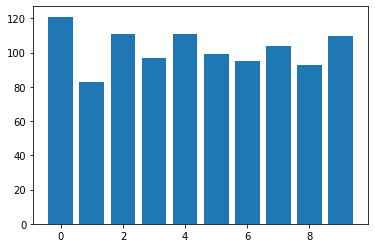

In [203]:
# 1024 samples are randomly generated
# Distribution of every number shows this data is balanced

sample_counts = [len(dis[dis == i]) for i in range(10)]
plt.bar(range(10), sample_counts)

In [204]:
data = np.array([patterns[v] for v in dis])
data[:5]

array([[1, 1, 0, 1, 1, 1, 1],
       [1, 0, 1, 1, 0, 1, 1],
       [1, 1, 1, 0, 0, 1, 0],
       [0, 1, 1, 1, 0, 1, 0],
       [1, 1, 0, 1, 1, 1, 1]])

[6 3 7 4 6 9 2 6 7 4 3 7 7 2 5 4 1 7 5 1 4 0 9 5 8 0 9 2 6 3 8 2 4 2 6 4 8
 6 1 3 8 1 9 8 9]


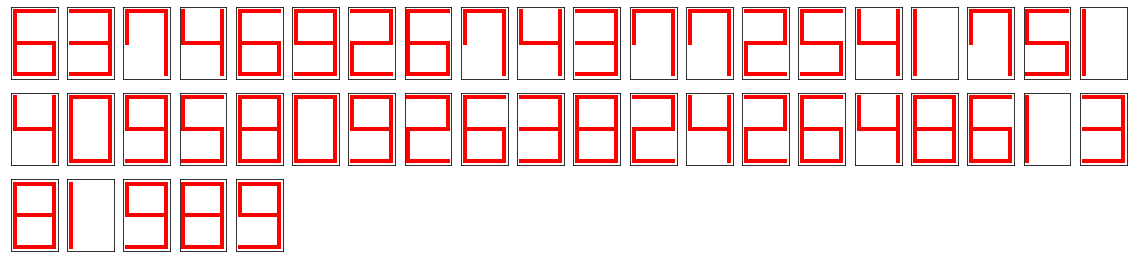

In [205]:
# Functions to draw pictures of given samples.

def DrawDigitalNumber(ax, sample):
    """
    draw one digital numebr on given axes
    """
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([-0.1, 1.6])
    for i, feature in enumerate(sample):
        if i == 0 and feature:
            ax.plot((0, 1), (1.5, 1.5), c='r', linewidth=4)
        if i == 1 and feature:
            ax.plot((0, 0), (0.75, 1.5), c='r', linewidth=4)
        if i == 2 and feature:
            ax.plot((1, 1), (0.75, 1.5), c='r', linewidth=4)
        if i == 3 and feature:
            ax.plot((0, 1), (0.75, 0.75), c='r', linewidth=4)
        if i == 4 and feature:
            ax.plot((0, 0), (0.75, 0), c='r', linewidth=4)
        if i == 5 and feature:
            ax.plot((1, 1), (0.75, 0), c='r', linewidth=4)
        if i == 6 and feature:
            ax.plot((0, 1), (0, 0), c='r', linewidth=4)

def DrawDigitalNumbers(count_in_lines, samples):
    """
    draw digital numbers based on input features
    """
    number = len(samples)
    
    rows = (number // count_in_lines + 1)
    fig = plt.figure(figsize=(1 * count_in_lines, 1.5 * rows))
    for i in range(number):
        ax = fig.add_subplot(rows, count_in_lines, i + 1)
        DrawDigitalNumber(ax, samples[i])
       
    
print(dis[:45])
DrawDigitalNumbers(20, data[:45])

In [206]:
# Create training set and valid set
# Do not change parameter values when doing the course work

X = data
Y = dis
Train_x, Valid_x, Train_y, Valid_y = train_test_split(X, Y, train_size=0.8, random_state=42)
Train_x.shape, Valid_y.shape

((819, 7), (205,))

# 2. Create Model

# ---------------------------------Subtasks start here------------------------------------

## Most important: One vs. One tricks
- You are going to finish these tasks using only perceptrons. However, perceptron can only deal with binary classification problem, so we need **One vs. One tricks** to deal with multi-class classification problems. Check the wikipedia before start: https://en.wikipedia.org/wiki/Multiclass_classification#One-vs.-one

## 2.1. Subtask1: Pure Numpy (40%)
- The basic idea is to use binary classifiers to deal with multiclass problems (class >= 3) by applying some tricks. Thus, the perceptron step below is the same as usual. You do not need to use softmax but just make votes by a series of binary classifiers. You can call the following functions multiple times to train all classifiers, but only one classifier will be trained in each call.

In [207]:
# 5%: fill in codes to update weights and bias. If correct, the next cell will generate same results

def StepFunction(xi, w, b):
    linear_combination = (np.matmul(xi, w) + b)[0]
    if linear_combination > 0:
        output = 1
    else:
        output = 0
    return output

def perceptronStep(X, y, W, b, learn_rate=0.01):
    for i in range(len(y)):
        output = StepFunction(X[i], W, b)
        
        if output != y[i]:
            if output == 0:
                for j in range(len(W)):
                    W[j] += X[i][j] * learn_rate
                b += learn_rate
            elif output == 1:
                for j in range(len(W)):
                    W[j] -= X[i][j] * learn_rate
                b -= learn_rate
    return W, b

In [208]:
# Do not change this seed when doing the course work
np.random.seed(42)

def trainPerceptronAlgorithm(X, y, learn_rate=0.01, num_epochs=5):
    W = np.array(np.random.rand(X.shape[1], 1))
    b = np.random.rand(1)[0] + max(X.T[0])
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
    return W, b

trainPerceptronAlgorithm(Train_x, Train_y)

(array([[ 0.02454012],
        [ 0.01071431],
        [-0.01800606],
        [ 0.00865848],
        [-0.01398136],
        [-0.05400548],
        [-0.05191639]]),
 0.006176145774933544)

In [209]:
# 20%: fill in codes to build the model with one vs. one tricks

# Do not change this seed when doing the course work
np.random.seed(42)

scores = np.zeros((len(Valid_y), 10))
count = np.unique(Train_y, return_counts=True)[1]

def fill_scores(scores, scores_train=None, epochs=None):
    for i in range(10):
        for j in range(i + 1, 10):
            inp_x = np.zeros((count[i] + count[j], Train_x.shape[1]))
            inp_y = np.zeros(count[i] + count[j])
            free_index = 0

            for z in range(len(Train_y)):
                if Train_y[z] == i or Train_y[z] == j:
                    inp_x[free_index] = Train_x[z]

                    if Train_y[z] == i:
                        inp_y[free_index] = 1 #i positive case
                    else:
                        inp_y[free_index] = 0 #j negative case

                    free_index += 1
            
            #classifer that can predict between i and j
            if epochs is not None:
                W, b = trainPerceptronAlgorithm(inp_x, inp_y, num_epochs=epochs)
            else:
                W, b = trainPerceptronAlgorithm(inp_x, inp_y)
                
            #fill scores (prediction for Valid_x)
            for idx, inp in enumerate(Valid_x):
                class_picked = i if StepFunction(inp, W, b) == 1 else j
                scores[idx][class_picked] +=1
                
            if scores_train is not None:
                #fill scores_train (prediction from Train_x)
                for idx, inp in enumerate(Train_x):
                    class_picked = i if StepFunction(inp, W, b) == 1 else j
                    scores_train[idx][class_picked] +=1            
          
fill_scores(scores)
Predict_Y = scores.argmax(1)
Predict_Y, Valid_y

(array([8, 9, 7, 2, 4, 4, 0, 6, 8, 9, 3, 7, 0, 0, 5, 2, 5, 9, 5, 4, 8, 4,
        1, 8, 6, 4, 5, 0, 6, 8, 7, 6, 0, 7, 8, 1, 3, 2, 9, 5, 6, 0, 8, 3,
        8, 9, 8, 5, 3, 4, 8, 1, 9, 5, 1, 3, 8, 9, 2, 2, 7, 7, 0, 7, 1, 8,
        4, 0, 7, 5, 8, 0, 4, 8, 5, 4, 6, 7, 6, 2, 2, 3, 2, 6, 6, 0, 7, 0,
        0, 9, 3, 0, 4, 8, 6, 3, 5, 7, 4, 0, 8, 7, 5, 9, 8, 4, 3, 6, 3, 6,
        7, 9, 1, 7, 9, 7, 1, 3, 9, 1, 1, 4, 2, 2, 3, 8, 1, 8, 7, 8, 5, 2,
        5, 9, 5, 0, 2, 7, 3, 8, 8, 2, 9, 7, 5, 2, 6, 3, 7, 4, 9, 3, 9, 2,
        0, 1, 4, 9, 7, 1, 1, 3, 7, 9, 8, 0, 2, 4, 3, 9, 6, 4, 6, 2, 9, 3,
        2, 2, 7, 3, 2, 1, 3, 2, 7, 9, 3, 4, 2, 9, 4, 0, 4, 2, 0, 2, 4, 0,
        2, 1, 7, 1, 9, 0, 1]),
 array([8, 9, 7, 2, 4, 4, 0, 6, 8, 9, 3, 7, 0, 0, 5, 2, 5, 9, 5, 4, 8, 4,
        1, 8, 6, 4, 5, 0, 6, 8, 7, 6, 0, 7, 8, 1, 3, 2, 9, 5, 6, 0, 8, 3,
        8, 9, 8, 5, 3, 4, 8, 1, 9, 5, 1, 3, 8, 9, 2, 2, 7, 7, 0, 7, 1, 8,
        4, 0, 7, 5, 8, 0, 4, 8, 5, 4, 6, 7, 6, 2, 2, 3, 2, 6, 6, 0, 7, 0,
       

[8 9 7 2 4 4 0 6 8 9]


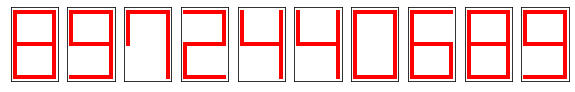

In [210]:
print(Predict_Y[:10])
DrawDigitalNumbers(10, Valid_x[:10])

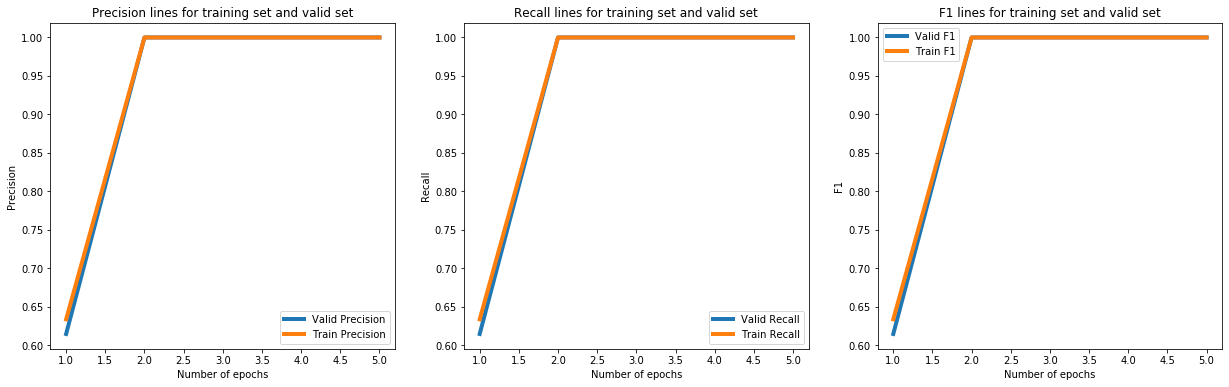

In [211]:
# 20%: Draw precision/recall/f1 lines for training set and valid set as epoch increasing from 1 to 5
# Note: titles, legends, labels and scales are required in your plots. You can choose colors and formats by yourself.

# I would recommend use precision_recall_fscore_support function from sklearn
from sklearn.metrics import precision_recall_fscore_support 

# Do not change this seed when doing the course work
np.random.seed(42)

f = plt.figure(figsize=(21, 6))
ax1 = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

def plotAxis(ax, valid, train, ylabel):
    ax.plot(range(1, 6), valid, linewidth=4, label=("Valid " + ylabel))
    ax.plot(range(1, 6), train, linewidth=4, label=("Train " + ylabel))
    ax.legend()
    ax.set_xlabel("Number of epochs")
    ax.set_ylabel(ylabel)
    ax.set_title(ylabel + " lines for training set and valid set")

precisions_train = []
precisions_valid = []
recalls_train = []
recalls_valid = []
f1s_train = []
f1s_valid = []

#settings
avg_type = 'micro'

for epochs in range(1, 6):
    scores = np.zeros((len(Valid_y), 10))
    scores_train = np.zeros((len(Train_y), 10))
    
    fill_scores(scores, scores_train, epochs)
    
    Predict_Y = scores.argmax(1)
    Predict_Train_Y = scores_train.argmax(1)
    
    precision, recall, f1, s = precision_recall_fscore_support(Valid_y, Predict_Y, average=avg_type)
    precisions_valid.append(precision)
    recalls_valid.append(recall)
    f1s_valid.append(f1)
    
    precision_train, recall_train, f1_train, s_train = precision_recall_fscore_support(Train_y, Predict_Train_Y, average=avg_type)
    precisions_train.append(precision_train)
    recalls_train.append(recall_train)
    f1s_train.append(f1_train)
    
plotAxis(ax1, precisions_valid, precisions_train, "Precision")
plotAxis(ax2, recalls_valid, recalls_train, "Recall")
plotAxis(ax3, f1s_valid, f1s_train, "F1")

## 2.2. Subtask2: Sklearn (5%)

In [212]:
from sklearn.linear_model import Perceptron

clf = Perceptron(max_iter=25, eta0=0.1, random_state=42)
clf

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=25, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=42, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [213]:
# 5%: check the usage of sklearn library and fill the codes to build the model, then print trained weights and bias
# Do not mind one vs. one tricks here, sklearn uses one vs. rest trciks in default

clf.fit(Train_x, Train_y)
print("Trained Weights are: ", clf.coef_)
print("Trained Bias are: ", clf.intercept_)

Trained Weights are:  [[-0.1 -0.1  0.1 -0.7  0.1  0.1  0.3]
 [-0.1  0.1 -0.1 -0.1  0.1 -0.1 -0.1]
 [ 0.  -0.3  0.   0.1  0.1 -0.4  0. ]
 [ 0.  -0.3  0.   0.1 -0.2  0.1  0. ]
 [-0.3  0.   0.1  0.2 -0.2  0.1 -0.2]
 [ 0.1  0.  -0.3  0.  -0.3  0.   0.1]
 [ 0.1 -0.2 -0.4  0.1  0.3  0.1  0.1]
 [ 0.1  0.   0.1 -0.2 -0.1  0.  -0.2]
 [-0.1  0.1  0.1  0.2  0.6  0.1 -0.1]
 [ 0.   0.3  0.2  0.  -0.6 -0.3  0.3]]
Trained Bias are:  [-0.3  0.  -0.1  0.  -0.1  0.  -0.3  0.  -0.9 -0.5]


## 2.3. Subtask3: Pytorch (25%)
- Probably you may have noticed it is too complicated to build a neural network with pure numpy, while too simple with sklearn that you can barely know nothing about the running process. Thus, we will do this with Pytorch, one of the most popular neural network library in Python. Pytorch allows users to build own neural network architecture intuitively. This is beacuse Pytorch updates weights and bias automatically once you set up the forwarding process of your network. In other words, Pytorch can implement backpropagation by itself.

In [214]:
import torch
print("My Pytorch version: " + torch.__version__)
from torch.autograd import Variable
import torch.nn as nn
import torch.optim as optim

def setup_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    torch.backends.cudnn.deterministic = True

My Pytorch version: 1.4.0


In [215]:
# 5%: set up the network architecture. If correct, the next cell will generate same results

# In general, we can import activation functions like Sigmoid or Relu directly from Pytroch Library
# However, Pytorch does not contain Heaviside Step Function
class StepF(torch.autograd.Function):
    def forward(self, input):
        input[input > 0] = 1
        input[input <= 0] = 0
        return input
    
    def backward(self, input):
        return input
    
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(7, 1)
        self.act = StepF()

    def forward(self, x):
        x = self.fc1(x)
        x = self.act(x)
        return x

In [216]:
# This is the sample codes to run a perceptron on a binary problem with Pytorch

setup_seed(42)
net = Net()
loss_fun = nn.BCELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

Sample_x, Sample_y = [], []
for i in range(len(Train_y)):
    if Train_y[i] in [0, 1]:
        Sample_x.append(Train_x[i])
        Sample_y.append(Train_y[i])
Sample_x = np.array(Sample_x)
Sample_y = np.array(Sample_y)
X = Variable(torch.FloatTensor(Sample_x), requires_grad=True)
Y = Variable(torch.FloatTensor(Sample_y), requires_grad=False)
for epoch in range(1, 11):
    outputs = net(X)
    loss = loss_fun(outputs, Y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print("Epoch {} - loss: {}".format(epoch, loss.data))

Epoch 1 - loss: 16.645198822021484
Epoch 2 - loss: 10.985822677612305
Epoch 3 - loss: 10.985822677612305
Epoch 4 - loss: 0.0
Epoch 5 - loss: 0.0
Epoch 6 - loss: 0.0
Epoch 7 - loss: 0.0
Epoch 8 - loss: 0.0
Epoch 9 - loss: 0.0
Epoch 10 - loss: 0.0


In [217]:
# 20%: based on codes above, fill the codes to build the digital number classfication model with one vs. one tricks

scores = np.zeros((len(Valid_y), 10))
for i in range(10):
    for j in range(i + 1, 10):
        setup_seed(42)
        net = Net()
        loss_fun = nn.BCELoss()
        optimizer = optim.SGD(net.parameters(), lr=0.01)
        
        inp_x = np.zeros((count[i] + count[j], Train_x.shape[1]))
        inp_y = np.zeros(count[i] + count[j])
        free_index = 0
        
        for z in range(len(Train_y)):
            if Train_y[z] == i or Train_y[z] == j:
                inp_x[free_index] = Train_x[z]

                if Train_y[z] == i:
                    inp_y[free_index] = 1 #i positive case
                else:
                    inp_y[free_index] = 0 #j negative case

                free_index += 1
        
        X = Variable(torch.FloatTensor(inp_x), requires_grad=True)
        Y = Variable(torch.FloatTensor(inp_y), requires_grad=False)
        for epoch in range(15):
            outputs = net(X)
            loss = loss_fun(outputs, Y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        print("Class {} - loss: {}".format(i, loss.data))

        paras = list(net.parameters())
        W, b = paras[0].detach().numpy().T, paras[1].detach().numpy()
        score = (np.dot(Valid_x, paras[0].detach().numpy().T) + paras[1].detach().numpy())[:,0]
        
        #todo: use StepF.forward
        clf = np.asarray([i if w > 0 else j for w in score])
        for idx in range(len(score)): #formatting voting results in score
            class_predicted = i if score[idx] > 0 else j
            scores[idx][class_predicted] += 1

Predict_Y = scores.argmax(1)
Predict_Y, Valid_y

Class 0 - loss: 0.0
Class 0 - loss: 0.0
Class 0 - loss: 0.0
Class 0 - loss: 0.0
Class 0 - loss: 0.0
Class 0 - loss: 0.0
Class 0 - loss: 0.0
Class 0 - loss: 0.0
Class 0 - loss: 0.0
Class 1 - loss: 0.0
Class 1 - loss: 0.0
Class 1 - loss: 0.0
Class 1 - loss: 0.0
Class 1 - loss: 0.0
Class 1 - loss: 0.0
Class 1 - loss: 0.0
Class 1 - loss: 0.0
Class 2 - loss: 0.0
Class 2 - loss: 0.0
Class 2 - loss: 0.0
Class 2 - loss: 0.0
Class 2 - loss: 0.0
Class 2 - loss: 0.0
Class 2 - loss: 0.0
Class 3 - loss: 0.0
Class 3 - loss: 0.0
Class 3 - loss: 0.0
Class 3 - loss: 0.0
Class 3 - loss: 0.0
Class 3 - loss: 0.0
Class 4 - loss: 0.0
Class 4 - loss: 0.0
Class 4 - loss: 0.0
Class 4 - loss: 0.0
Class 4 - loss: 0.0
Class 5 - loss: 0.0
Class 5 - loss: 0.0
Class 5 - loss: 0.0
Class 5 - loss: 0.0
Class 6 - loss: 0.0
Class 6 - loss: 12.89447021484375
Class 6 - loss: 0.0
Class 7 - loss: 0.0
Class 7 - loss: 0.0
Class 8 - loss: 0.0


(array([8, 9, 7, 2, 4, 4, 0, 6, 8, 9, 3, 7, 0, 0, 5, 2, 5, 9, 5, 4, 8, 4,
        1, 8, 6, 4, 5, 0, 6, 8, 7, 6, 0, 7, 8, 1, 3, 2, 9, 5, 6, 0, 8, 3,
        8, 9, 8, 5, 3, 4, 8, 1, 9, 5, 1, 3, 8, 9, 2, 2, 7, 7, 0, 7, 1, 8,
        4, 0, 7, 5, 8, 0, 4, 8, 5, 4, 6, 7, 6, 2, 2, 3, 2, 6, 6, 0, 7, 0,
        0, 9, 3, 0, 4, 8, 6, 3, 5, 7, 4, 0, 8, 7, 5, 9, 8, 4, 3, 6, 3, 6,
        7, 9, 1, 7, 9, 7, 1, 3, 9, 1, 1, 4, 2, 2, 3, 8, 1, 8, 7, 8, 5, 2,
        5, 9, 5, 0, 2, 7, 3, 8, 8, 2, 9, 7, 5, 2, 6, 3, 7, 4, 9, 3, 9, 2,
        0, 1, 4, 9, 7, 1, 1, 3, 7, 9, 8, 0, 2, 4, 3, 9, 6, 4, 6, 2, 9, 3,
        2, 2, 7, 3, 2, 1, 3, 2, 7, 9, 3, 4, 2, 9, 4, 0, 4, 2, 0, 2, 4, 0,
        2, 1, 7, 1, 9, 0, 1]),
 array([8, 9, 7, 2, 4, 4, 0, 6, 8, 9, 3, 7, 0, 0, 5, 2, 5, 9, 5, 4, 8, 4,
        1, 8, 6, 4, 5, 0, 6, 8, 7, 6, 0, 7, 8, 1, 3, 2, 9, 5, 6, 0, 8, 3,
        8, 9, 8, 5, 3, 4, 8, 1, 9, 5, 1, 3, 8, 9, 2, 2, 7, 7, 0, 7, 1, 8,
        4, 0, 7, 5, 8, 0, 4, 8, 5, 4, 6, 7, 6, 2, 2, 3, 2, 6, 6, 0, 7, 0,
       

## 2.4. Subtask4: Digital Alphabet Data (25%)

In [218]:
Image(url=pic_links[2]) 

In [219]:
"""
Develop the codes: Create digital alphabet data (upper-case letters), and then build a neural network.
Hint: If you feel that linear perceptron cannot handle this data, you can use multi-layer structures
      and non-linear activation functions. Please refer to the warming-up exercises for more hints.
"""

alphabet = {
    "A": [1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0],
    "B": [1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1],
    "C": [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
    "D": [1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1], 
    "E": [1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1],
    "F": [1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
    "G": [1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1],
    "H": [0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0],
    "I": [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
    "J": [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1],
    "K": [0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0],
    "L": [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
    "M": [0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0],
    "N": [0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0],
    "O": [1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1],
    "P": [1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
    "Q": [1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1],
    "R": [1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0],
    "S": [1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1],
    "T": [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    "U": [0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1],
    "V": [0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
    "W": [0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1],
    "X": [0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0],
    "Y": [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    "Z": [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1]
}

In [220]:
def intToUpperCase(n):
    return chr(65 + n)

#get X, Y data from random generation
Y = np.array([intToUpperCase(n) for n in rng.randint(0, 26, size=(1024))])
X = np.array([alphabet[v] for v in Y])

Train_x, Valid_x, Train_y, Valid_y = train_test_split(X, Y, train_size=0.8, random_state=42)

In [221]:
scores = np.zeros((len(Valid_y), 26))
scores_train = np.zeros((len(Train_y), 26))
count = np.unique(Train_y, return_counts=True)[1]
    
for i in range(26):
    for j in range(i + 1, 26):
        inp_x = np.zeros((count[i] + count[j], Train_x.shape[1]))
        inp_y = np.zeros(count[i] + count[j])
        free_index = 0

        for z in range(len(Train_y)):
            if Train_y[z] == intToUpperCase(i) or Train_y[z] == intToUpperCase(j):
                inp_x[free_index] = Train_x[z]

                if Train_y[z] == intToUpperCase(i):
                    inp_y[free_index] = 1 #i positive case
                else:
                    inp_y[free_index] = 0 #j negative case

                free_index += 1

        #classifer that can predict between i and j
        W, b = trainPerceptronAlgorithm(inp_x, inp_y)
        
        #fill scores (prediction from Valid_x)
        for idx, inp in enumerate(Valid_x):
            class_picked = i if StepFunction(inp, W, b) == 1 else j
            scores[idx][class_picked] +=1
            
scores = scores.argmax(1)
scores = np.vectorize(intToUpperCase)(scores) #format int 0-25 from one vs rest to uppercase characters
Predict_Y = scores
Predict_Y, Valid_y, accuracy_score(Valid_y, Predict_y) #print test_y?

(array(['R', 'J', 'X', 'L', 'R', 'Q', 'K', 'M', 'R', 'Y', 'Z', 'S', 'Q',
        'Y', 'O', 'N', 'H', 'Y', 'Y', 'O', 'W', 'E', 'A', 'S', 'E', 'C',
        'C', 'C', 'U', 'O', 'Q', 'G', 'A', 'Z', 'Y', 'J', 'W', 'F', 'O',
        'F', 'B', 'O', 'U', 'M', 'Q', 'M', 'A', 'K', 'V', 'C', 'L', 'C',
        'G', 'Y', 'A', 'I', 'A', 'J', 'G', 'W', 'G', 'W', 'C', 'L', 'Y',
        'K', 'V', 'T', 'T', 'K', 'X', 'D', 'V', 'S', 'M', 'U', 'K', 'K',
        'E', 'R', 'U', 'H', 'Q', 'R', 'B', 'J', 'H', 'L', 'Y', 'Y', 'U',
        'U', 'O', 'M', 'S', 'Q', 'T', 'M', 'Q', 'Y', 'W', 'V', 'L', 'R',
        'S', 'S', 'W', 'W', 'N', 'A', 'O', 'Y', 'A', 'C', 'S', 'C', 'Z',
        'S', 'B', 'X', 'I', 'S', 'Q', 'O', 'V', 'O', 'M', 'G', 'C', 'A',
        'U', 'R', 'J', 'E', 'W', 'I', 'O', 'T', 'W', 'J', 'M', 'Y', 'E',
        'X', 'N', 'Y', 'L', 'B', 'I', 'F', 'M', 'V', 'X', 'Y', 'B', 'A',
        'W', 'V', 'E', 'K', 'L', 'L', 'A', 'E', 'B', 'R', 'R', 'X', 'L',
        'R', 'T', 'X', 'A', 'F', 'G', 'A', 'G', 'E'